In [1]:
import pandas as pd

In [24]:
Attrition_df=pd.read_csv("C:/Users/localadmin/Desktop/Attrition 1.csv")
Employee_df =pd.read_csv("C:/Users/localadmin/Documents/employee_data 1.csv")
Employee_performance_df = pd.read_csv("C:/Users/localadmin/Desktop/employee_performance_data 1.csv")

In [5]:
Attrition_df.head()

,employee_ID,attrition,Exit_Interview_Score
0,474,True,2
1,97,True,4
2,729,False,1
3,278,False,2
4,470,False,4


In [6]:
Employee_df.head()

,Employee_ID,Age,first_name,last_name,gender,Gender,Department,Job_Role,Education_Level,Marital_Status,Job_Tenure,Distance_From_Home
0,1,22,Konstantin,Shutler,Male,Other,HR,Developer,PhD,Married,1,8
1,2,38,Thorvald,Skoggins,Male,Other,IT,Marketing Lead,Master's,Married,18,32
2,3,35,Gracia,Teggin,Genderqueer,Male,Sales,Senior Developer,Bachelor's,Divorced,4,42
3,4,37,Kerwinn,Romme,Male,Male,Marketing,Senior Developer,Bachelor's,Divorced,5,43
4,5,26,Randene,Millier,Female,Female,Operations,Manager,Master's,Single,10,33


In [7]:
Employee_performance_df.head()

,Employee_ID,Performance_Rating,Last_Promotion_Year,Training_Hours,Work_Life_Balance,Job_Satisfaction
0,1,2,2019,28,3,1
1,2,4,2022,174,3,2
2,3,1,2022,119,5,4
3,4,4,2015,82,4,1
4,5,3,2014,46,2,4


In [8]:
Employee_df.info

<bound method DataFrame.info of      Employee_ID  Age  first_name last_name       gender  Gender  Department  \
0              1   22  Konstantin   Shutler         Male   Other          HR   
1              2   38    Thorvald  Skoggins         Male   Other          IT   
2              3   35      Gracia    Teggin  Genderqueer    Male       Sales   
3              4   37     Kerwinn     Romme         Male    Male   Marketing   
4              5   26     Randene   Millier       Female  Female  Operations   
..           ...  ...         ...       ...          ...     ...         ...   
995          996   59        Wain     Lyffe         Male    Male     Finance   
996          997   53     Agustin      Pile         Male   Other          IT   
997          998   43      Curtis  Maxfield  Genderfluid  Female          IT   
998          999   44    Hamilton   Aimable         Male  Female          HR   
999         1000   30   Frederico    Tokley         Male   Other  Operations   

       

In [25]:
Employee_df.isnull().sum()

Employee_ID           0
Age                   0
first_name            0
last_name             0
gender                0
Gender                0
Department            0
Job_Role              0
Education_Level       0
Marital_Status        0
Job_Tenure            0
Distance_From_Home    0
dtype: int64

In [26]:
print(Employee_df['gender'].unique())
print(Employee_df['Gender'].unique())

['Male' 'Genderqueer' 'Female' 'Genderfluid' 'Bigender' 'Agender'
 'Non-binary' 'Polygender']
['Other' 'Male' 'Female']


In [ ]:
def resolve_gender(row):
    g1 = str(row['gender']).strip().lower()
    g2 = str(row['Gender']).strip().lower()

  
    if g1 == g2:
        return g1

    if g1 == 'other' and g2 not in ['other', '']:
        return g2
    if g2 == 'other' and g1 not in ['other', '']:
        return g1


    priority = ['genderfluid', 'genderqueer', 'female', 'male', 'other']
    for identity in priority:
        if identity in [g1, g2]:
            return identity

   
    return 'unspecified'

# Apply the function
Employee_df['gender_cleaned'] = Employee_df.apply(resolve_gender, axis=1)

In [28]:
Employee_df


,Employee_ID,Age,first_name,last_name,gender,Gender,Department,Job_Role,Education_Level,Marital_Status,Job_Tenure,Distance_From_Home,gender_cleaned
0,1,22,Konstantin,Shutler,Male,Other,HR,Developer,PhD,Married,1,8,male
1,2,38,Thorvald,Skoggins,Male,Other,IT,Marketing Lead,Master's,Married,18,32,male
2,3,35,Gracia,Teggin,Genderqueer,Male,Sales,Senior Developer,Bachelor's,Divorced,4,42,genderqueer
3,4,37,Kerwinn,Romme,Male,Male,Marketing,Senior Developer,Bachelor's,Divorced,5,43,male
4,5,26,Randene,Millier,Female,Female,Operations,Manager,Master's,Single,10,33,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,59,Wain,Lyffe,Male,Male,Finance,Data Analyst,Bachelor's,Married,12,48,male
996,997,53,Agustin,Pile,Male,Other,IT,Senior Developer,PhD,Single,1,9,male
997,998,43,Curtis,Maxfield,Genderfluid,Female,IT,Developer,PhD,Married,4,8,genderfluid
998,999,44,Hamilton,Aimable,Male,Female,HR,Developer,Bachelor's,Married,4,45,female


In [13]:
conflicts = Employee_df[Employee_df['gender'] != Employee_df['Gender']]
print(conflicts[['Employee_ID', 'gender', 'Gender', 'first_name', 'last_name']])

     Employee_ID       gender  Gender  first_name     last_name
0              1         Male   Other  Konstantin       Shutler
1              2         Male   Other    Thorvald      Skoggins
2              3  Genderqueer    Male      Gracia        Teggin
5              6       Female   Other     Nikolia         Buten
6              7  Genderfluid    Male      Rupert     Truesdale
..           ...          ...     ...         ...           ...
994          995       Female    Male      Debbie  Blackborough
996          997         Male   Other     Agustin          Pile
997          998  Genderfluid  Female      Curtis      Maxfield
998          999         Male  Female    Hamilton       Aimable
999         1000         Male   Other   Frederico        Tokley

[706 rows x 5 columns]


In [98]:
def resolve_gender(row):
    g1=str(row['gender']).strip().lower()
    g2 = str(row['Gender']).strip().lower()

    if g1==g2:
        return g1
    
    if g1 =='other' and g2  in['male','female']:
        return g2
    if g2 == 'other' and g1  in['male','female']:
        return g1
    
    priority = ['genderfluid', 'genderqueer', 'female', 'male', 'other']
    
    for identity in priority:
        if identity in [g1,g2]:
            return identity

    return 'unspecified'    

Employee_df['cleaned_gender']=Employee_df.apply(resolve_gender,axis=1)

In [19]:
Employee_df['full name'] = Employee_df['first_name']+' '+Employee_df['last_name']

In [99]:
Employee_df

,Employee_ID,Age,first_name,last_name,gender,Gender,Department,Job_Role,Education_Level,Marital_Status,Job_Tenure,Distance_From_Home,gender_cleaned,cleaned_gender
0,1,22,Konstantin,Shutler,Male,Other,HR,Developer,PhD,Married,1,8,male,male
1,2,38,Thorvald,Skoggins,Male,Other,IT,Marketing Lead,Master's,Married,18,32,male,male
2,3,35,Gracia,Teggin,Genderqueer,Male,Sales,Senior Developer,Bachelor's,Divorced,4,42,genderqueer,genderqueer
3,4,37,Kerwinn,Romme,Male,Male,Marketing,Senior Developer,Bachelor's,Divorced,5,43,male,male
4,5,26,Randene,Millier,Female,Female,Operations,Manager,Master's,Single,10,33,female,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,59,Wain,Lyffe,Male,Male,Finance,Data Analyst,Bachelor's,Married,12,48,male,male
996,997,53,Agustin,Pile,Male,Other,IT,Senior Developer,PhD,Single,1,9,male,male
997,998,43,Curtis,Maxfield,Genderfluid,Female,IT,Developer,PhD,Married,4,8,genderfluid,genderfluid
998,999,44,Hamilton,Aimable,Male,Female,HR,Developer,Bachelor's,Married,4,45,female,female


In [16]:
Employee_performance_df

,Employee_ID,Performance_Rating,Last_Promotion_Year,Training_Hours,Work_Life_Balance,Job_Satisfaction
0,1,2,2019,28,3,1
1,2,4,2022,174,3,2
2,3,1,2022,119,5,4
3,4,4,2015,82,4,1
4,5,3,2014,46,2,4
...,...,...,...,...,...,...
995,996,3,2015,77,4,2
996,997,5,2023,33,3,4
997,998,1,2023,135,2,3
998,999,4,2020,100,2,2


In [32]:
Attrition_df

,Employee_ID,attrition,Exit_Interview_Score
0,474,True,2
1,97,True,4
2,729,False,1
3,278,False,2
4,470,False,4
...,...,...,...
139,213,False,2
140,603,False,4
141,79,False,4
142,272,True,1


In [18]:
Employee_performance_df.isnull().sum()

Employee_ID            0
Performance_Rating     0
Last_Promotion_Year    0
Training_Hours         0
Work_Life_Balance      0
Job_Satisfaction       0
dtype: int64

In [31]:

Attrition_df.rename(columns={'employee_ID': 'Employee_ID'}, inplace=True)
#Employee_df=Employee_df.merge(Attrition_df,on='Employee_ID',how='left')

In [22]:
Employee_df

,Employee_ID,Age,first_name,last_name,gender,Gender,Department,Job_Role,Education_Level,Marital_Status,Job_Tenure,Distance_From_Home,cleaned_gender,full name,attrition,Exit_Interview_Score
0,1,22,Konstantin,Shutler,Male,Other,HR,Developer,PhD,Married,1,8,male,Konstantin Shutler,NaN,NaN
1,2,38,Thorvald,Skoggins,Male,Other,IT,Marketing Lead,Master's,Married,18,32,male,Thorvald Skoggins,False,3.0
2,3,35,Gracia,Teggin,Genderqueer,Male,Sales,Senior Developer,Bachelor's,Divorced,4,42,genderqueer,Gracia Teggin,NaN,NaN
3,4,37,Kerwinn,Romme,Male,Male,Marketing,Senior Developer,Bachelor's,Divorced,5,43,male,Kerwinn Romme,NaN,NaN
4,5,26,Randene,Millier,Female,Female,Operations,Manager,Master's,Single,10,33,female,Randene Millier,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,996,59,Wain,Lyffe,Male,Male,Finance,Data Analyst,Bachelor's,Married,12,48,male,Wain Lyffe,NaN,NaN
1013,997,53,Agustin,Pile,Male,Other,IT,Senior Developer,PhD,Single,1,9,male,Agustin Pile,NaN,NaN
1014,998,43,Curtis,Maxfield,Genderfluid,Female,IT,Developer,PhD,Married,4,8,genderfluid,Curtis Maxfield,NaN,NaN
1015,999,44,Hamilton,Aimable,Male,Female,HR,Developer,Bachelor's,Married,4,45,female,Hamilton Aimable,NaN,NaN


In [23]:
Employee_df['attrition'] = Employee_df['attrition'].fillna(False)

C:\Users\localadmin\AppData\Local\Temp\ipykernel_10908\2523736722.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Employee_df['attrition'] = Employee_df['attrition'].fillna(False)


In [36]:
# Temporary join for analysis
active_with_attrition =Employee_df.merge(Attrition_df, on='Employee_ID', how='left')

In [37]:
active_with_attrition

,Employee_ID,Age,first_name,last_name,gender,Gender,Department,Job_Role,Education_Level,Marital_Status,Job_Tenure,Distance_From_Home,gender_cleaned,attrition,Exit_Interview_Score
0,1,22,Konstantin,Shutler,Male,Other,HR,Developer,PhD,Married,1,8,male,NaN,NaN
1,2,38,Thorvald,Skoggins,Male,Other,IT,Marketing Lead,Master's,Married,18,32,male,False,3.0
2,3,35,Gracia,Teggin,Genderqueer,Male,Sales,Senior Developer,Bachelor's,Divorced,4,42,genderqueer,NaN,NaN
3,4,37,Kerwinn,Romme,Male,Male,Marketing,Senior Developer,Bachelor's,Divorced,5,43,male,NaN,NaN
4,5,26,Randene,Millier,Female,Female,Operations,Manager,Master's,Single,10,33,female,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,996,59,Wain,Lyffe,Male,Male,Finance,Data Analyst,Bachelor's,Married,12,48,male,NaN,NaN
1013,997,53,Agustin,Pile,Male,Other,IT,Senior Developer,PhD,Single,1,9,male,NaN,NaN
1014,998,43,Curtis,Maxfield,Genderfluid,Female,IT,Developer,PhD,Married,4,8,genderfluid,NaN,NaN
1015,999,44,Hamilton,Aimable,Male,Female,HR,Developer,Bachelor's,Married,4,45,female,NaN,NaN


In [38]:
active_with_attrition.drop(columns=['first_name', 'last_name', 'gender', 'Gender'], inplace=True)

In [39]:
active_with_attrition

,Employee_ID,Age,Department,Job_Role,Education_Level,Marital_Status,Job_Tenure,Distance_From_Home,gender_cleaned,attrition,Exit_Interview_Score
0,1,22,HR,Developer,PhD,Married,1,8,male,NaN,NaN
1,2,38,IT,Marketing Lead,Master's,Married,18,32,male,False,3.0
2,3,35,Sales,Senior Developer,Bachelor's,Divorced,4,42,genderqueer,NaN,NaN
3,4,37,Marketing,Senior Developer,Bachelor's,Divorced,5,43,male,NaN,NaN
4,5,26,Operations,Manager,Master's,Single,10,33,female,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1012,996,59,Finance,Data Analyst,Bachelor's,Married,12,48,male,NaN,NaN
1013,997,53,IT,Senior Developer,PhD,Single,1,9,male,NaN,NaN
1014,998,43,IT,Developer,PhD,Married,4,8,genderfluid,NaN,NaN
1015,999,44,HR,Developer,Bachelor's,Married,4,45,female,NaN,NaN


In [40]:
active_with_attrition['attrition'] = active_with_attrition['attrition'].fillna(False)

C:\Users\localadmin\AppData\Local\Temp\ipykernel_10908\603816198.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  active_with_attrition['attrition'] = active_with_attrition['attrition'].fillna(False)


In [41]:
active_with_attrition['attrition'] = active_with_attrition['attrition'].fillna(False)
active_with_attrition = active_with_attrition.infer_objects(copy=False)

In [42]:
active_with_attrition.head()

,Employee_ID,Age,Department,Job_Role,Education_Level,Marital_Status,Job_Tenure,Distance_From_Home,gender_cleaned,attrition,Exit_Interview_Score
0,1,22,HR,Developer,PhD,Married,1,8,male,False,NaN
1,2,38,IT,Marketing Lead,Master's,Married,18,32,male,False,3.0
2,3,35,Sales,Senior Developer,Bachelor's,Divorced,4,42,genderqueer,False,NaN
3,4,37,Marketing,Senior Developer,Bachelor's,Divorced,5,43,male,False,NaN
4,5,26,Operations,Manager,Master's,Single,10,33,female,False,NaN


In [47]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [46]:
!pip install matplotlib

  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp313-cp313-win_amd64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.2-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ---------------------------------------- 0/7 [pyparsing]
   -

In [48]:
import matplotlib.pyplot as plt

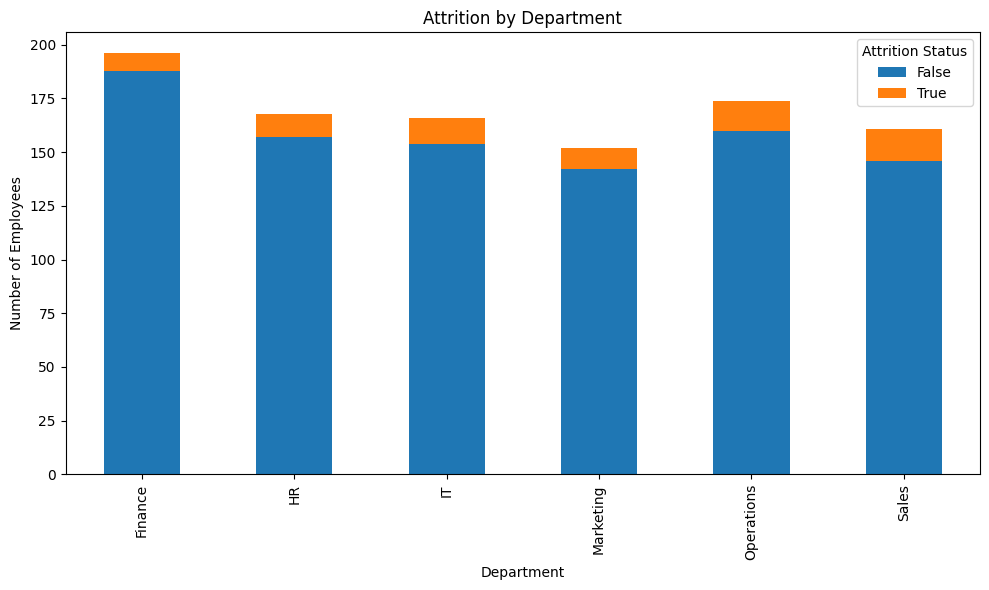

In [49]:
# Count attrition status per department
attrition_counts = active_with_attrition.groupby('Department')['attrition'].value_counts().unstack().fillna(0)

# Plot it
import matplotlib.pyplot as plt

attrition_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition Status')
plt.tight_layout()
plt.show()

In [50]:
active_with_attrition.groupby('Department')['Job_Tenure'].mean()

Department
Finance       10.612245
HR            10.178571
IT            10.144578
Marketing     10.677632
Operations     9.839080
Sales         10.248447
Name: Job_Tenure, dtype: float64

In [51]:
active_with_attrition['Department'].value_counts()

Department
Finance       196
Operations    174
HR            168
IT            166
Sales         161
Marketing     152
Name: count, dtype: int64

In [52]:
active_with_attrition['attrition'].value_counts()

attrition
False    947
True      70
Name: count, dtype: int64

In [54]:
active_with_attrition[(active_with_attrition['Department'] == 'HR') & 
                      (active_with_attrition['Job_Tenure'] > 10)].count()

Employee_ID             83
Age                     83
Department              83
Job_Role                83
Education_Level         83
Marital_Status          83
Job_Tenure              83
Distance_From_Home      83
gender_cleaned          83
attrition               83
Exit_Interview_Score    10
dtype: int64

In [55]:
active_with_attrition[active_with_attrition['attrition'] == True]['Exit_Interview_Score'].mean()

np.float64(3.0428571428571427)

In [56]:
dept_count = active_with_attrition['Department'].value_counts()

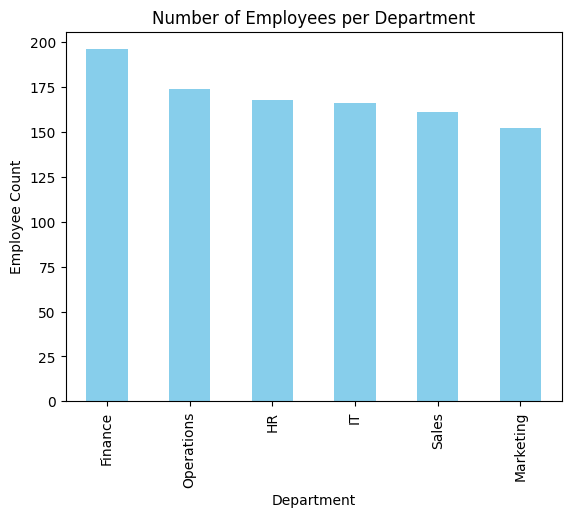

In [57]:
dept_count.plot(kind='bar', color='skyblue')
plt.title("Number of Employees per Department")
plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.show()

In [59]:
def tenure_bucket(years):
    if years < 1:
        return 'New'
    elif years < 3:
        return 'Junior'
    elif years < 5:
        return 'Mid'
    else:
        return 'Senior'

active_with_attrition['TenureBucket'] = active_with_attrition['Job_Tenure'].apply(tenure_bucket)

In [60]:
active_with_attrition.head()

,Employee_ID,Age,Department,Job_Role,Education_Level,Marital_Status,Job_Tenure,Distance_From_Home,gender_cleaned,attrition,Exit_Interview_Score,TenureBucket
0,1,22,HR,Developer,PhD,Married,1,8,male,False,NaN,Junior
1,2,38,IT,Marketing Lead,Master's,Married,18,32,male,False,3.0,Senior
2,3,35,Sales,Senior Developer,Bachelor's,Divorced,4,42,genderqueer,False,NaN,Mid
3,4,37,Marketing,Senior Developer,Bachelor's,Divorced,5,43,male,False,NaN,Senior
4,5,26,Operations,Manager,Master's,Single,10,33,female,False,NaN,Senior


In [62]:
Employee_performance_df.head()

,Employee_ID,Performance_Rating,Last_Promotion_Year,Training_Hours,Work_Life_Balance,Job_Satisfaction
0,1,2,2019,28,3,1
1,2,4,2022,174,3,2
2,3,1,2022,119,5,4
3,4,4,2015,82,4,1
4,5,3,2014,46,2,4


In [63]:
df = pd.merge(active_with_attrition, Employee_performance_df, on='Employee_ID')

In [64]:
df.head()

,Employee_ID,Age,Department,Job_Role,Education_Level,Marital_Status,Job_Tenure,Distance_From_Home,gender_cleaned,attrition,Exit_Interview_Score,TenureBucket,Performance_Rating,Last_Promotion_Year,Training_Hours,Work_Life_Balance,Job_Satisfaction
0,1,22,HR,Developer,PhD,Married,1,8,male,False,NaN,Junior,2,2019,28,3,1
1,2,38,IT,Marketing Lead,Master's,Married,18,32,male,False,3.0,Senior,4,2022,174,3,2
2,3,35,Sales,Senior Developer,Bachelor's,Divorced,4,42,genderqueer,False,NaN,Mid,1,2022,119,5,4
3,4,37,Marketing,Senior Developer,Bachelor's,Divorced,5,43,male,False,NaN,Senior,4,2015,82,4,1
4,5,26,Operations,Manager,Master's,Single,10,33,female,False,NaN,Senior,3,2014,46,2,4


In [65]:
from datetime import datetime
current_year = datetime.now().year
df['YearsSincePromotion'] = current_year - df['Last_Promotion_Year']

In [71]:
df.head()

,Employee_ID,Age,Department,Job_Role,Education_Level,Marital_Status,Job_Tenure,Distance_From_Home,gender_cleaned,attrition,...,TenureBucket,Performance_Rating,Last_Promotion_Year,Training_Hours,Work_Life_Balance,Job_Satisfaction,YearsSincePromotion,TrainingIntensity,LowSatisfaction,PoorWorkLifeBalance
0,1,22,HR,Developer,PhD,Married,1,8,male,False,...,Junior,2,2019,28,3,1,6,4.000000,True,False
1,2,38,IT,Marketing Lead,Master's,Married,18,32,male,False,...,Senior,4,2022,174,3,2,3,43.500000,True,False
2,3,35,Sales,Senior Developer,Bachelor's,Divorced,4,42,genderqueer,False,...,Mid,1,2022,119,5,4,3,29.750000,False,False
3,4,37,Marketing,Senior Developer,Bachelor's,Divorced,5,43,male,False,...,Senior,4,2015,82,4,1,10,7.454545,True,False
4,5,26,Operations,Manager,Master's,Single,10,33,female,False,...,Senior,3,2014,46,2,4,11,3.833333,False,True


In [68]:
df['TrainingIntensity'] = df['Training_Hours'] / (df['YearsSincePromotion'] + 1)

In [70]:
df['LowSatisfaction'] = df['Job_Satisfaction'] < 3
df['PoorWorkLifeBalance'] = df['Work_Life_Balance'] < 3

In [96]:
from urllib.parse import quote_plus
def create_mysql_engine(user, password, host, database):
    safe_password = quote_plus(password)
    connection_string = f'mysql+pymysql://{user}:{safe_password}@{host}/{database}'

    return connection_string
   
engine = create_mysql_engine('root', 'Deloitte@123', 'localhost', 'Employee_Performance')

In [109]:
Employee_df=Employee_df.drop(['gender','Gender','first_name','last_name'],axis=1)

In [110]:
#df.to_sql('Analytics', con=engine, if_exists='append', index=False)
Employee_df.to_sql('dimEmployee', con=engine, if_exists='replace', index=False)
Employee_performance_df.to_sql('dimEmployee_performance',con=engine,if_exists='replace',index=False)
Attrition_df.to_sql('Attrition',con=engine,if_exists='replace',index=False)

C:\Users\localadmin\AppData\Local\Temp\ipykernel_10908\2864225089.py:2: UserWarning: The provided table name 'dimEmployee' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  Employee_df.to_sql('dimEmployee', con=engine, if_exists='replace', index=False)
C:\Users\localadmin\AppData\Local\Temp\ipykernel_10908\2864225089.py:3: UserWarning: The provided table name 'dimEmployee_performance' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  Employee_performance_df.to_sql('dimEmployee_performance',con=engine,if_exists='replace',index=False)
C:\Users\localadmin\AppData\Local\Temp\ipykernel_10908\2864225089.py:4: UserWarning: The provided table name 'Attrition' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case

144

In [75]:
df['AttritionFlag'] = df['attrition'].astype(int)

In [76]:
# Average tenure of employees who left
left_avg_tenure = df[df['AttritionFlag'] == 1]['Job_Tenure'].mean()

# Average tenure of employees who stayed
stayed_avg_tenure = df[df['AttritionFlag'] == 0]['Job_Tenure'].mean()

print("Average tenure of employees who left:", round(left_avg_tenure, 2))
print("Average tenure of employees who stayed:", round(stayed_avg_tenure, 2))

Average tenure of employees who left: 9.93
Average tenure of employees who stayed: 10.31


In [77]:
# Group by attrition status
grouped = df.groupby('AttritionFlag')

# Calculate averages
job_sat = grouped['Job_Satisfaction'].mean()
work_life = grouped['Work_Life_Balance'].mean()
growth = grouped['YearsSincePromotion'].mean()

print("Job Satisfaction (Stayed vs Left):", job_sat)
print("Work-Life Balance (Stayed vs Left):", work_life)
print("Years Since Promotion (Stayed vs Left):", growth)

Job Satisfaction (Stayed vs Left): AttritionFlag
0    3.001056
1    2.842857
Name: Job_Satisfaction, dtype: float64
Work-Life Balance (Stayed vs Left): AttritionFlag
0    3.090813
1    2.928571
Name: Work_Life_Balance, dtype: float64
Years Since Promotion (Stayed vs Left): AttritionFlag
0    8.058078
1    8.071429
Name: YearsSincePromotion, dtype: float64


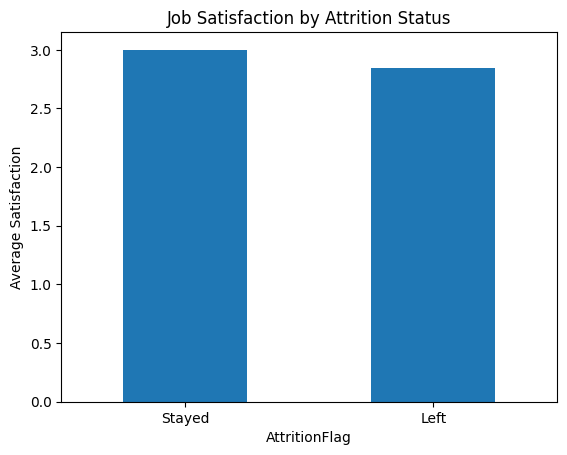

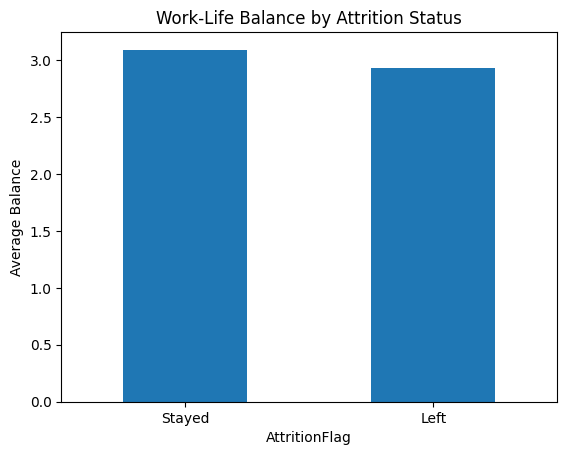

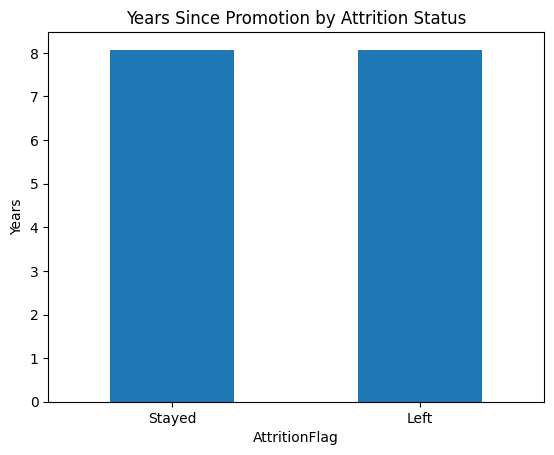

In [78]:
import matplotlib.pyplot as plt

# Job Satisfaction
job_sat.plot(kind='bar', title='Job Satisfaction by Attrition Status')
plt.xticks([0, 1], ['Stayed', 'Left'], rotation=0)
plt.ylabel('Average Satisfaction')
plt.show()

# Work-Life Balance
work_life.plot(kind='bar', title='Work-Life Balance by Attrition Status')
plt.xticks([0, 1], ['Stayed', 'Left'], rotation=0)
plt.ylabel('Average Balance')
plt.show()

# Growth (Years Since Promotion)
growth.plot(kind='bar', title='Years Since Promotion by Attrition Status')
plt.xticks([0, 1], ['Stayed', 'Left'], rotation=0)
plt.ylabel('Years')
plt.show()

In [79]:
correlations = df[['AttritionFlag', 'Job_Satisfaction', 'Work_Life_Balance', 'YearsSincePromotion']].corr()
print(correlations['AttritionFlag'])

AttritionFlag          1.000000
Job_Satisfaction      -0.028196
Work_Life_Balance     -0.030109
YearsSincePromotion    0.000768
Name: AttritionFlag, dtype: float64


In [80]:
df['GrowthIndex'] = (
    (df['NumPromotions'] / (df['Job_Tenure'] + 1)) + 
    (df['Training_Hours'] / (df['Job_Tenure'] + 1))
)

KeyError: 'NumPromotions'

In [81]:
print(df.columns)

Index(['Employee_ID', 'Age', 'Department', 'Job_Role', 'Education_Level',
       'Marital_Status', 'Job_Tenure', 'Distance_From_Home', 'gender_cleaned',
       'attrition', 'Exit_Interview_Score', 'TenureBucket',
       'Performance_Rating', 'Last_Promotion_Year', 'Training_Hours',
       'Work_Life_Balance', 'Job_Satisfaction', 'YearsSincePromotion',
       'TrainingIntensity', 'LowSatisfaction', 'PoorWorkLifeBalance',
       'AttritionFlag'],
      dtype='object')


In [84]:
df['GrowthIndex'] = (
    (df['Performance_Rating'] / 5) +  # Normalize rating (scale 1–5)
    (df['Training_Hours'] / (df['Job_Tenure'] + 1))   # Training intensity # Penalize stagnation
)

In [85]:
df['GrowthIndex']

0       14.400000
1        9.957895
2       24.000000
3       14.466667
4        4.781818
          ...    
1012     6.523077
1013    17.500000
1014    27.200000
1015    20.800000
1016    40.300000
Name: GrowthIndex, Length: 1017, dtype: float64

In [86]:
df.to_csv('employee_attrition_data.csv', index=False)

In [103]:
gender_df =pd.DataFrame(Employee_df[['Employee_ID','gender_cleaned']])

In [101]:
Employee_df.columns

Index(['Employee_ID', 'Age', 'first_name', 'last_name', 'gender', 'Gender',
       'Department', 'Job_Role', 'Education_Level', 'Marital_Status',
       'Job_Tenure', 'Distance_From_Home', 'gender_cleaned', 'cleaned_gender'],
      dtype='object')

In [104]:
gender_df.to_csv('gender_df.csv')